In [33]:
import pandas as pd   #simple regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

df=pd.read_excel('ANN dataset NC.xlsx')
df

,Sl.no,Area in sqm,Type of the building,Project name,Location of the building,Earthwork excavation,Back filling,Earth from outside,PCC works,RCC works,...,Cost of the structure,Cost of quality,Time of completion in months,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,786.00,Residential Project,Residential Project of Mr. Sasi and Ms. Raksha,"Harinagar, Banaglore",914353.00,442976,407855.00,300622.84,7764888.00,...,12625719,NaN,16 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5443.52,Commercial,"D'MART BHIMAVARAM, A.P","Bhimavaram, A.P",2034500.00,232430,487360.00,1362750.00,11989400.00,...,29800225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7350.67,Commercial,Goverment Godowns for storage of EVM's and VVP...,"Bellari District, Karanataka",1214372.64,333333,456788.00,1332215.56,10240545.49,...,30497255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1288.89,Commercial,Vijayanagar Club,"Vijayanagar, Bangalore",784920.00,,189160.00,739848.00,3386236.00,...,8200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1476.67,Commercial,Office Complex of Assistant Director of Agricu...,"Bellari District, Karnataka",245356.00,210826.49,267724.00,502990.67,1117418.95,...,10600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2088.00,Residential Villa,Main Land Villas by Sowparnika Builders,"Kadugodi, Bangalore",543000.00,245000,112000.00,402030.00,8956000.00,...,27848670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,3143.00,Residential Project,Residential Project of Mr. Nagabhushan and Ms....,"Napa Valley, Kaggalipura",782000.00,256000,212122.00,475123.00,821233.00,...,35045000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,656.00,Residential Project,Residnetial Project of Mr. Suraj,"Mysore, Karnataka",105130.00,123000,112000.00,153162.00,1592681.00,...,6800875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1020.00,Residential Project,Residential Project of Mr. Arvind,"Srirangpatna, Karnataka",630780.00,392000,224000.00,918972.00,9556086.00,...,56778133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1176.00,Resdential Villa,Sowparnika Capital County,"Thiruvananthapuram, Kerala",814500.00,317143,123232.00,804060.00,17912000.00,...,55697340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sl.no                         25 non-null     int64  
 1   Area in sqm                   25 non-null     float64
 2   Type of the building          25 non-null     object 
 3   Project name                  25 non-null     object 
 4   Location of the building      25 non-null     object 
 5   Earthwork excavation          25 non-null     float64
 6   Back filling                  25 non-null     object 
 7   Earth from outside            24 non-null     float64
 8   PCC works                     25 non-null     float64
 9   RCC works                     25 non-null     float64
 10  Steel in tons                 25 non-null     float64
 11  Steel in tons                 25 non-null     int64  
 12  No. of floors                 25 non-null     object 
 13  Masonry

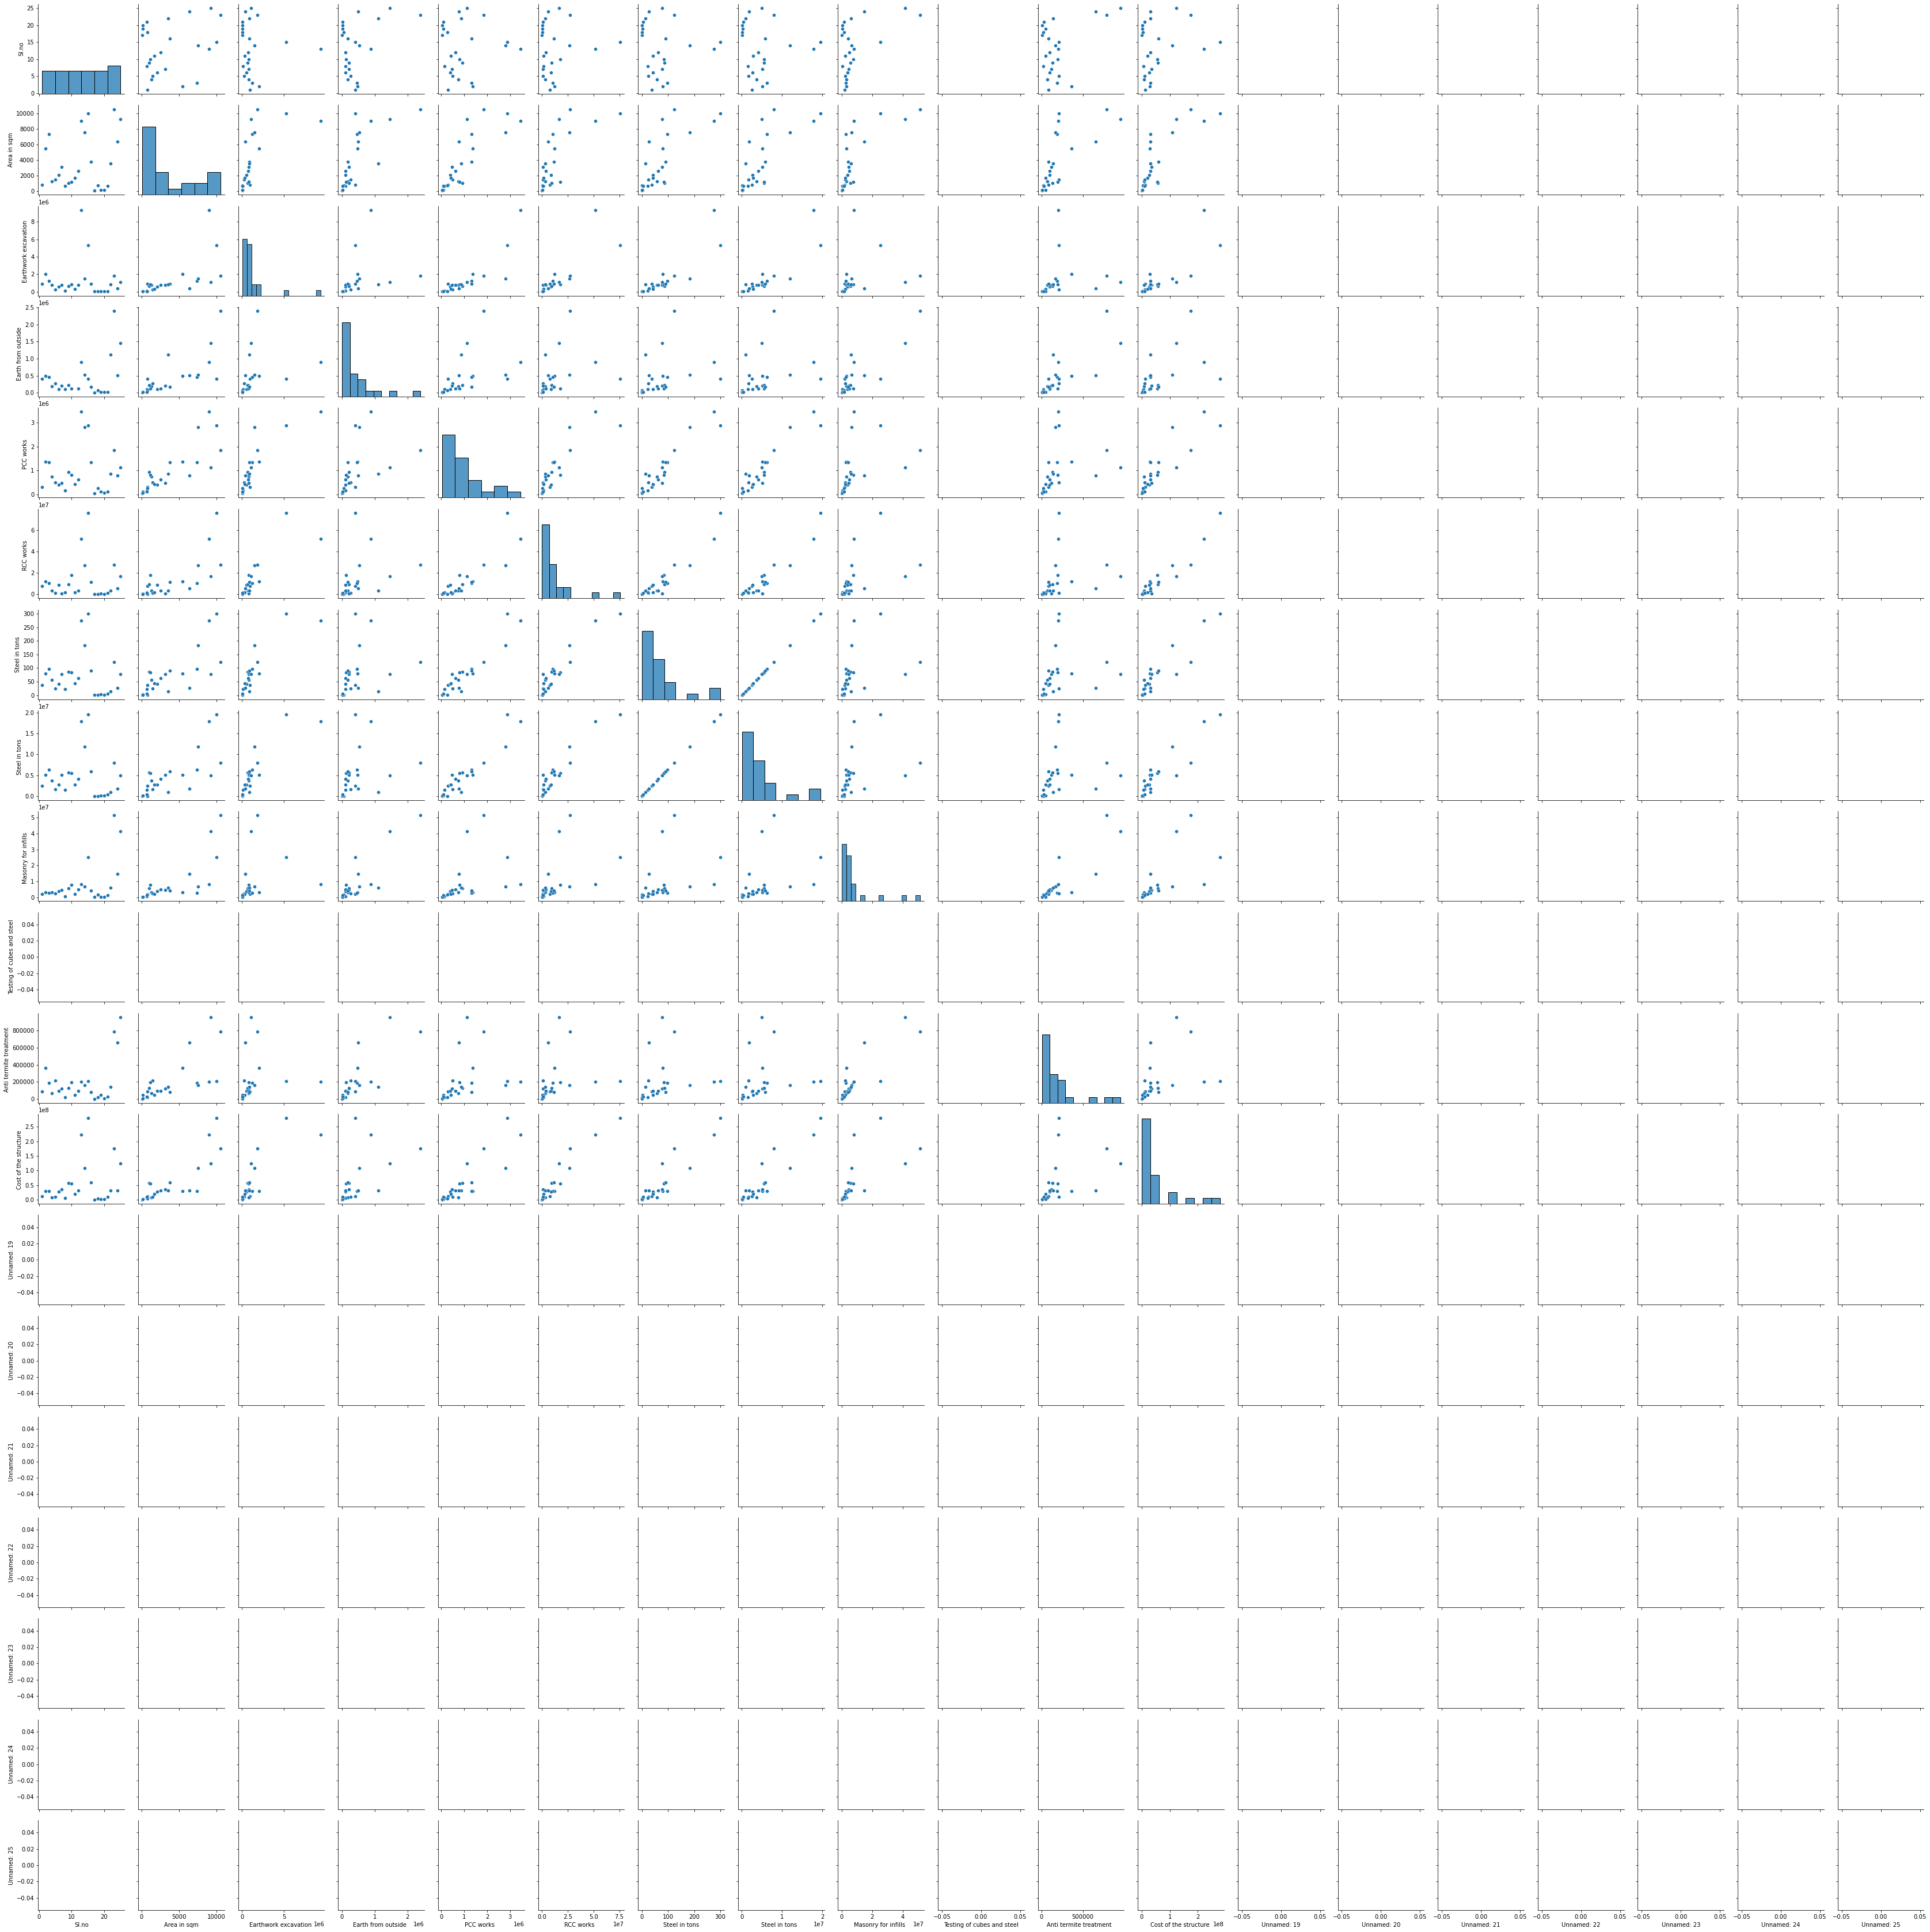

In [4]:
sns.pairplot(df)

In [35]:
corrmat=df.corr()  #correlation--diagonal 1
corrmat

,Sl.no,Area in sqm,Earthwork excavation,Earth from outside,PCC works,RCC works,Steel in tons,Steel in tons,Masonry for infills,Testing of cubes and steel,Anti termite treatment,Cost of the structure,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
Sl.no,1.000000,0.247937,-0.033890,0.376838,0.045507,0.080958,-0.066225,-0.066225,0.476526,NaN,0.399804,0.234577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area in sqm,0.247937,1.000000,0.634338,0.737641,0.832872,0.737215,0.751841,0.751841,0.745561,NaN,0.712024,0.824033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earthwork excavation,-0.033890,0.634338,1.000000,0.317265,0.842595,0.839824,0.867620,0.867620,0.255811,NaN,0.151247,0.816198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earth from outside,0.376838,0.737641,0.317265,1.000000,0.472876,0.358589,0.327670,0.327670,0.858429,NaN,0.789722,0.553297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PCC works,0.045507,0.832872,0.842595,0.472876,1.000000,0.875250,0.943280,0.943280,0.428192,NaN,0.324459,0.878512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCC works,0.080958,0.737215,0.839824,0.358589,0.875250,1.000000,0.944798,0.944798,0.487346,NaN,0.266992,0.956952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Steel in tons,-0.066225,0.751841,0.867620,0.327670,0.943280,0.944798,1.000000,1.000000,0.393139,NaN,0.211353,0.919302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Steel in tons,-0.066225,0.751841,0.867620,0.327670,0.943280,0.944798,1.000000,1.000000,0.393139,NaN,0.211353,0.919302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Masonry for infills,0.476526,0.745561,0.255811,0.858429,0.428192,0.487346,0.393139,0.393139,1.000000,NaN,0.865259,0.665181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Testing of cubes and steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

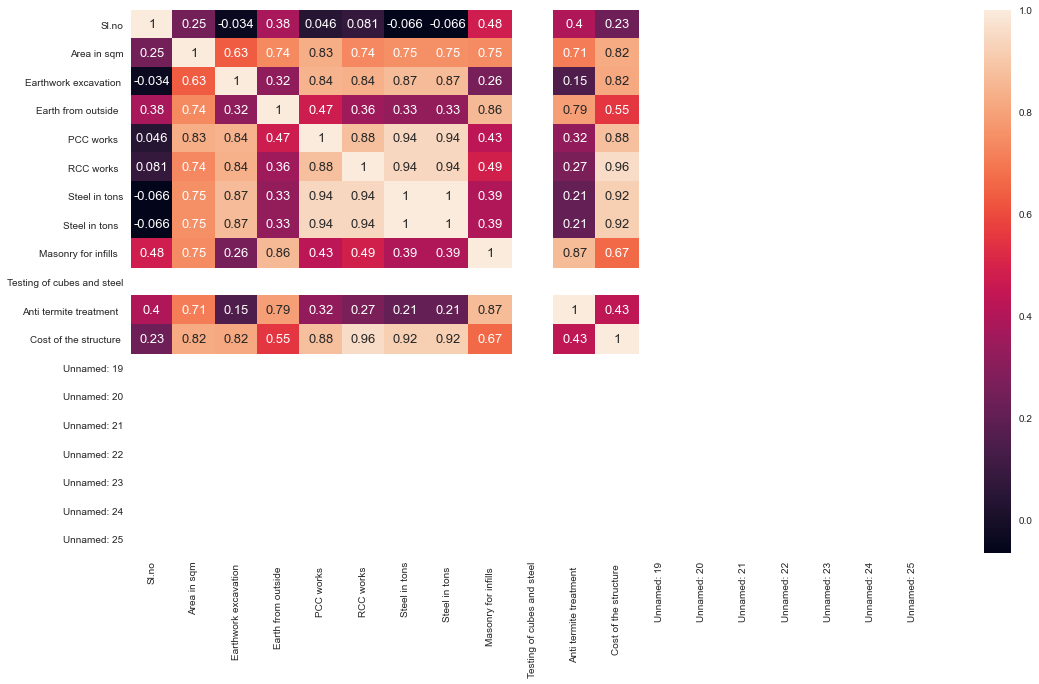

In [36]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':13})

In [66]:
X=df[["Area in sqm"]]
y=df["Cost of the structure "]

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)  #random_state=0 means we get same data sample split between training and test state

In [68]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [69]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
print(model.intercept_)

-8774782.61781662


In [82]:
#coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#coeff_df

In [83]:
r_sq = model.score(X, y)   #coeeficient
r_sq

0.6717459724107059

In [72]:
y_predict=model.predict(X_test)

In [73]:
y_predict,y_test

(array([ 3.02499867e+07,  1.28609413e+08, -5.69092872e+06, -7.48517099e+06,
         3.91838180e+07]),
 5     27848670
 2     30497255
 19     2600000
 16      634065
 11    31362000
 Name: Cost of the structure , dtype: int64)

In [74]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)

-9.144881712496051

In [75]:
metrics.mean_absolute_error(y_test,y_predict)

24949091.50757058

In [76]:
metrics.mean_squared_error(y_test,y_predict)

1965520847347367.5

In [77]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))


44334195.01183446

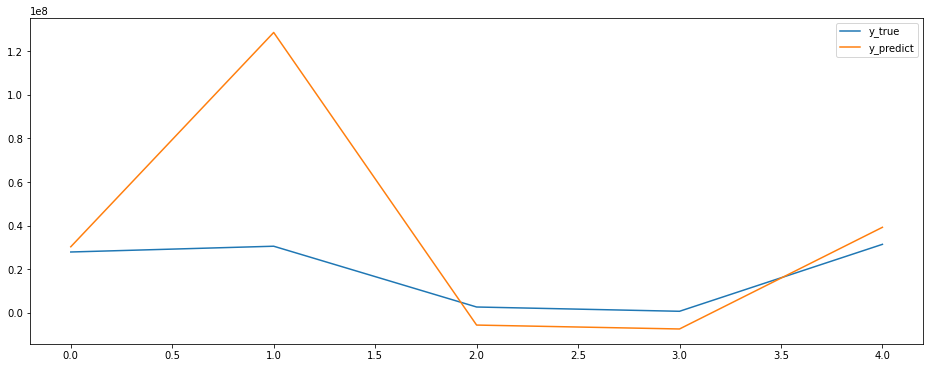

In [17]:
plt.subplots(figsize=(16,6))
x_points=list(range(len(y_test)))
plt.plot(x_points,y_test,label="y_true")
plt.plot(x_points,y_predict,label="y_predict")
plt.legend()
plt.show() 

In [18]:
# 

In [19]:
from yellowbrick.regressor import ResidualsPlot

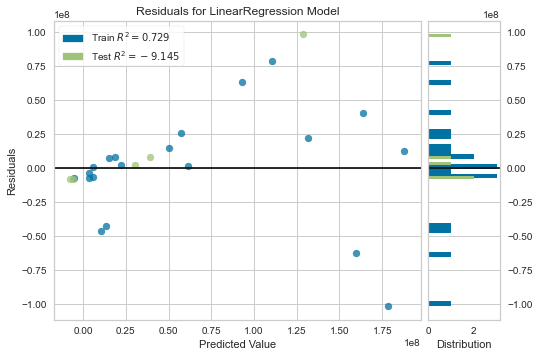

In [20]:
viz=ResidualsPlot(model)
viz.fit(X_train,y_train)
viz.score(X_test,y_test)
viz.show()
plt.show()

In [21]:
from yellowbrick.regressor import PredictionError

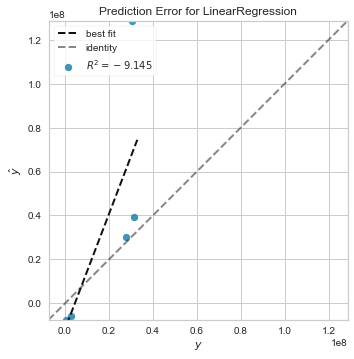

In [22]:
viz=PredictionError(model)
viz.fit(X_train,y_train)
viz.score(X_test,y_test)
viz.show()
plt.show()

In [24]:
np.random.seed(0)

n=df.shape[0]
x=np.random.randn(n)

y=10*x + np.random.randn(n)*2

In [30]:
demo_df=pd.DataFrame([x,y]).T
demo_df.columns=["x","y"]
demo_df.head()

,x,y
0,1.764052,14.731792
1,0.400157,4.093089
2,0.978738,9.413012
3,2.240893,25.474490
4,1.867558,21.614297


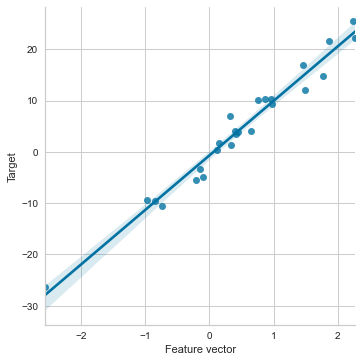

In [32]:
sns.lmplot(x='x',y='y',data=demo_df,order=1)
plt.ylabel('Target')
plt.xlabel('Feature vector')
plt.show()
